In [13]:
import pandas as pd
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [46]:
data = pd.read_csv("flight/1rad_acs.txt",header=None)

time  = np.linspace(0,data.shape[0]*0.1,data.shape[0])

pwm_x = data.iloc[:,0]
pwm_y= data.iloc[:,1]
pwm_z  = data.iloc[:,2]
current_x  =  data.iloc[:,3]
current_y  =  data.iloc[:,4]
current_z  =  data.iloc[:,5]

temp  =  data.iloc[:,6]
vol  =  data.iloc[:,7]

mag_x_raw  =  data.iloc[:,8]
mag_y_raw  =  data.iloc[:,9]
mag_z_raw  =  data.iloc[:,10]

mag_x_off  =  data.iloc[:,8+6]
mag_y_off  =  data.iloc[:,9+6]
mag_z_off  =  data.iloc[:,10+6]

mag_x_ekf  =  data.iloc[:,8+6+6]
mag_y_ekf  =  data.iloc[:,9+6+6]
mag_z_ekf  =  data.iloc[:,10+6+6]


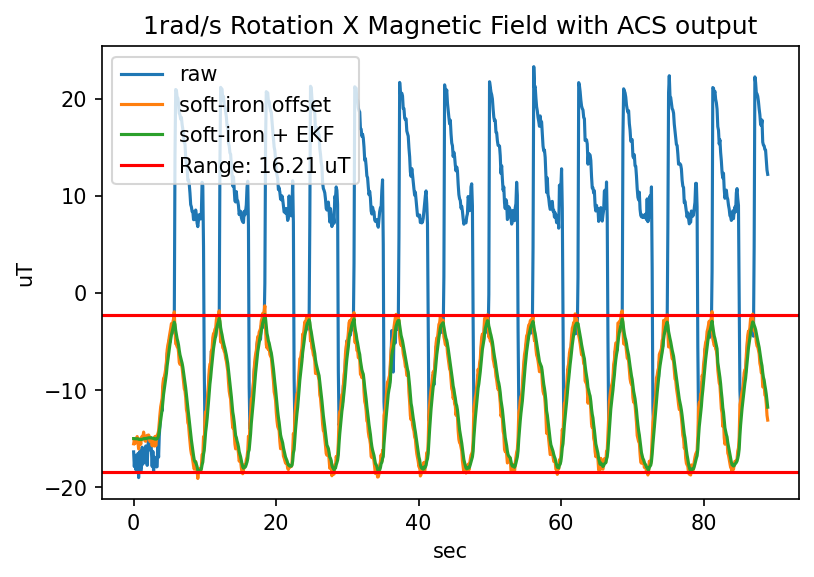

In [47]:
max_x_value  = max(mag_x_ekf)
min_x_value = min(mag_x_ekf)

time =  time
plt.figure(dpi=150)
plt.plot(time,mag_x_raw, label="raw")
plt.plot(time,mag_x_off, label="soft-iron offset")
plt.plot(time,mag_x_ekf,label="soft-iron + EKF")


plt.axhline(y=max_x_value, color='r', linestyle='-')
plt.axhline(y=min_x_value, color='r', linestyle='-', label=f'Range: {round(max_x_value-min_x_value,2)} uT')
plt.xlabel("sec")
plt.ylabel("uT")
plt.title("1rad/s Rotation X Magnetic Field with ACS output")
plt.legend()
plt.show()

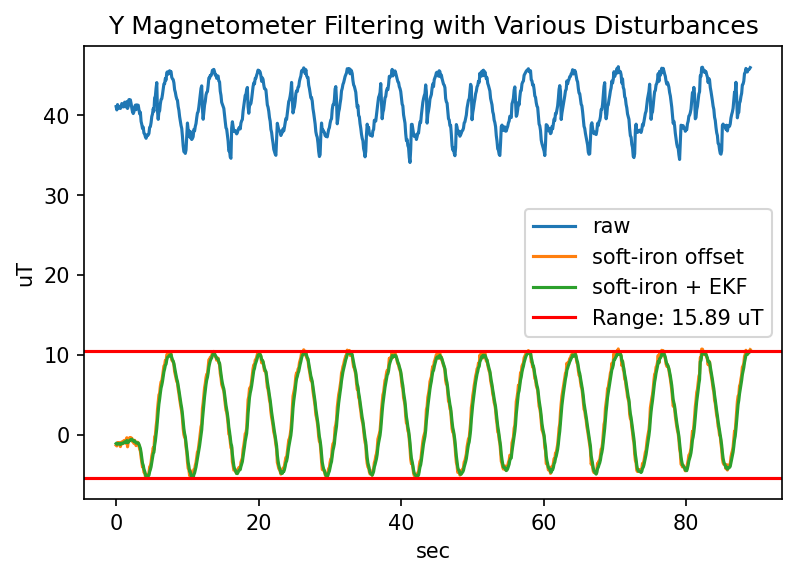

In [48]:
max_y_value  = max(mag_y_ekf)
min_y_value = min(mag_y_ekf)

plt.figure(dpi=150)
plt.plot(time,mag_y_raw, label="raw")
plt.plot(time,mag_y_off, label="soft-iron offset")
plt.plot(time,mag_y_ekf,label="soft-iron + EKF")

plt.axhline(y=max_y_value, color='r', linestyle='-')
plt.axhline(y=min_y_value, color='r', linestyle='-', label=f'Range: {round(max_y_value-min_y_value,2)} uT')
plt.xlabel("sec")
plt.ylabel("uT")
plt.title("Y Magnetometer Filtering with Various Disturbances")
plt.legend()
plt.show()

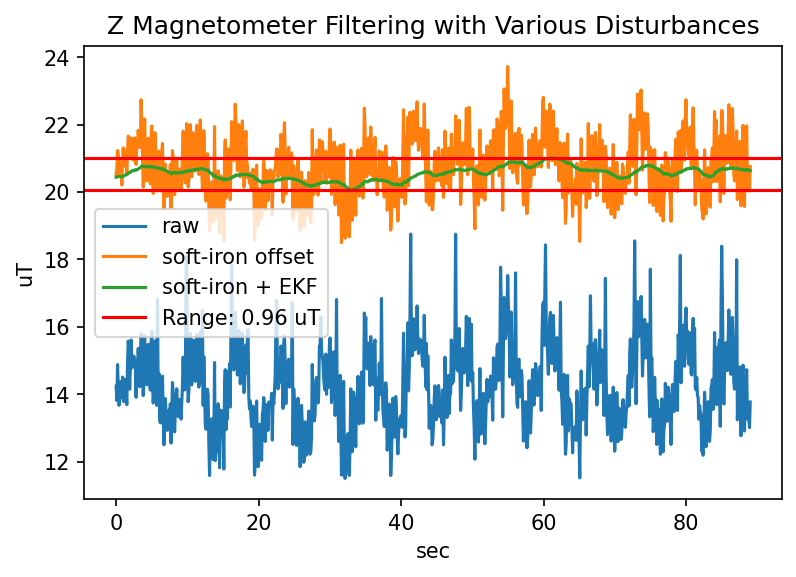

In [49]:
max_z_value  = max(mag_z_ekf)
min_z_value = min(mag_z_ekf)

plt.figure(dpi=150)
plt.plot(time,mag_z_raw, label="raw")
plt.plot(time,mag_z_off, label="soft-iron offset")
plt.plot(time,mag_z_ekf,label="soft-iron + EKF")

plt.axhline(y=max_z_value, color='r', linestyle='-')
plt.axhline(y=min_z_value, color='r', linestyle='-', label=f'Range: {round(max_z_value-min_z_value,2)} uT')
plt.xlabel("sec")
plt.ylabel("uT")
plt.title("Z Magnetometer Filtering with Various Disturbances")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (130,) and (263,)

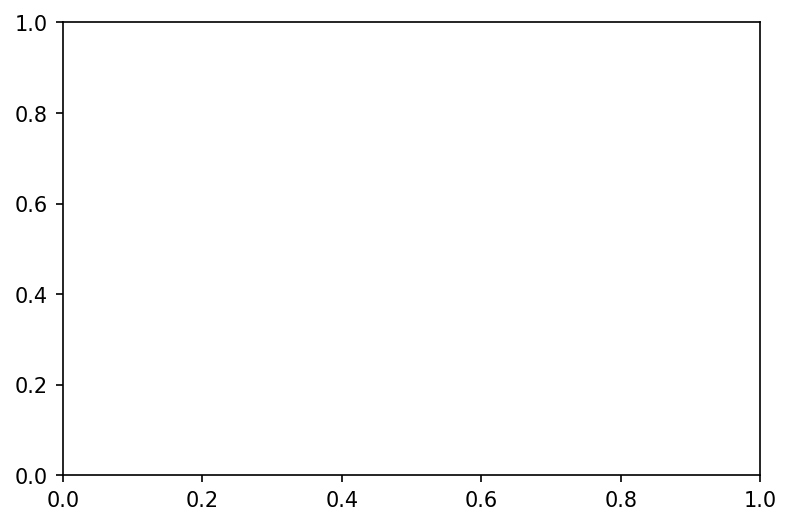

In [34]:
plt.figure(dpi=150)
plt.plot(time,vol, label='Voltage')

plt.xlabel("sec")
plt.ylabel("V")
plt.title("Time vs Voltage")
plt.legend()
plt.show()


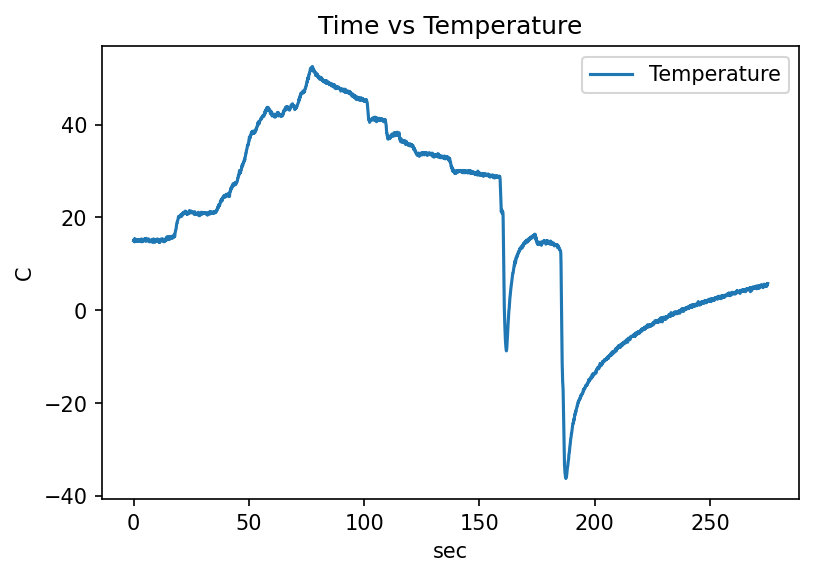

In [38]:
plt.figure(dpi=150)
plt.plot(time,temp, label='Temperature')

plt.xlabel("sec")
plt.ylabel("C")
plt.title("Time vs Temperature")
plt.legend()
plt.show()

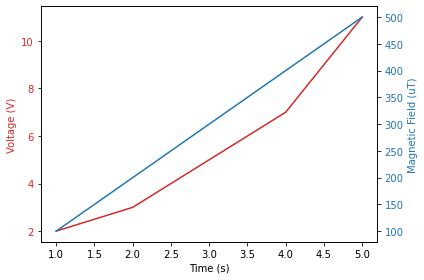

In [16]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]  # Common x-axis data
y1 = [2, 3, 5, 7, 11]  # Data for the first y-axis (e.g., voltage)
y2 = [100, 200, 300, 400, 500]  # Data for the second y-axis (e.g., microtesla)

# Create the first plot with the first y-axis
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Magnetic Field (uT)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot with both y-axes
fig.tight_layout()  # to ensure the right y-label is not slightly clipped
plt.show()


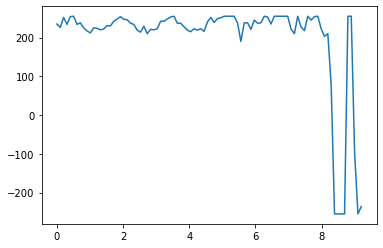

In [28]:
plt.plot(time, pwm_z)